Dataset Resource : https://www.kaggle.com/atulanandjha/temperature-readings-iot-devices

Task : 

1.Variance of temprature inside and outside room?

2.How inside temprature related to outside temprature

##### There are 5 columns are present in our dataset. that's means,we are having 5-dimensional spaces:



1. id : Unique id for each reading
2. room_id/ : room id in which device was installed(inside/and or outside)
3. note_data : date and time of reading
4. temp : temprature readings
5. out/In: whether reading was taken from device installed inside or outside of Room

### Let's import the library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
from google.colab import files
uploaded = files.upload()

Saving IOT_filter_data.csv to IOT_filter_data (1).csv


#### We read the IOT dataset

In [30]:
data = pd.read_csv("IOT_filter_data.csv")

#### By default, we get top 5 rows

In [31]:
data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,12/8/2018 9:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,12/8/2018 9:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,12/8/2018 9:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,12/8/2018 9:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,12/8/2018 9:29,31,In


#### Using shape, let's get shape of dataset

In [32]:
data.shape

(6999, 5)

Observation : There are 6999 rows and 5 columns

In [33]:
data.columns

Index(['id', 'room_id/id', 'noted_date', 'temp', 'out/in'], dtype='object')

Observation : We got number of columns which are existing in DataFrame

In [34]:
data['out/in'].value_counts()

Out    4531
In     2468
Name: out/in, dtype: int64

Observation : temprature reading was taken by installed device inside room = 4531 and outside room = 2468

In [35]:
print("Unique values in every column \n"+'-'*25)
for i in data.columns:
  print("\t"+i+"=",len(set(data[i])))

Unique values in every column 
-------------------------
	id= 6998
	room_id/id= 1
	noted_date= 3307
	temp= 23
	out/in= 2


Observation : We got unique value for every column

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          6999 non-null   object
 1   room_id/id  6999 non-null   object
 2   noted_date  6999 non-null   object
 3   temp        6999 non-null   int64 
 4   out/in      6999 non-null   object
dtypes: int64(1), object(4)
memory usage: 273.5+ KB


In [37]:
data.describe()

,temp
count,6999.000000
mean,34.150450
std,4.828534
min,21.000000
25%,29.000000
50%,36.000000
75%,38.000000
max,43.000000


Using data.describe(), 
we got total row count: 6999
mean = 34.150450
standard_deviation: 4.828534
min value = 21
25% = 29.0
50% = 36.000
75% = 38.000
maximum value = 43.000000

In [38]:
df = data.drop(['id','room_id/id'],axis=1)
df.head()

,noted_date,temp,out/in
0,12/8/2018 9:30,29,In
1,12/8/2018 9:30,29,In
2,12/8/2018 9:29,41,Out
3,12/8/2018 9:29,41,Out
4,12/8/2018 9:29,31,In


**We check for missing value**

In [39]:
data.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

We did not find any null value

**Separate date and time**

In [45]:
date = [] # date list is declared
time = [] # time list is declared

for i in df['noted_date']:
  #print(i)
  date.append(i.split(' ')[0])
  time.append(i.split(' ')[1])
df['date'] = date
df['time'] = time
df.head()


,noted_date,temp,out/in,date,time
0,12/8/2018 9:30,29,In,12/8/2018,9:30
1,12/8/2018 9:30,29,In,12/8/2018,9:30
2,12/8/2018 9:29,41,Out,12/8/2018,9:29
3,12/8/2018 9:29,41,Out,12/8/2018,9:29
4,12/8/2018 9:29,31,In,12/8/2018,9:29


**Observation : Need to drop the noted_date column parmanently**

In [46]:
df.drop(['noted_date'],axis=1,inplace=True)
df.head()

,temp,out/in,date,time
0,29,In,12/8/2018,9:30
1,29,In,12/8/2018,9:30
2,41,Out,12/8/2018,9:29
3,41,Out,12/8/2018,9:29
4,31,In,12/8/2018,9:29


**Observation :We have splitted the date and time in new different columns(date and time) for simplicity**

**Let's separate the date in day,month and year**

In [48]:
try:
  df['date'] = pd.to_datetime(df['date'])# converted date into standard format year-month-daye.
  df['year'] = df.date.dt.year
  df['month'] = df.date.dt.month
  df['day'] = df.date.dt.day
except:
  print("Operations already performed")  
#print(df['date'])

In [49]:
df.head()

,temp,out/in,date,time,year,month,day
0,29,In,2018-12-08,9:30,2018,12,8
1,29,In,2018-12-08,9:30,2018,12,8
2,41,Out,2018-12-08,9:29,2018,12,8
3,41,Out,2018-12-08,9:29,2018,12,8
4,31,In,2018-12-08,9:29,2018,12,8


**Let's drop date column**

In [50]:
df.drop(['date'],axis=1,inplace=True)
df.head()

,temp,out/in,time,year,month,day
0,29,In,9:30,2018,12,8
1,29,In,9:30,2018,12,8
2,41,Out,9:29,2018,12,8
3,41,Out,9:29,2018,12,8
4,31,In,9:29,2018,12,8


**let's sort the year,month and day** *italicized text*

In [51]:
print("Days of observation:",sorted(df['day'].unique()))
print("Months of observation:",sorted(df['month'].unique()))
print("Years of observation:",sorted(df['year'].unique()))

Days of observation: [1, 2, 3, 4, 5, 6, 7, 8]
Months of observation: [12]
Years of observation: [2018]


In [52]:
df.head()

,temp,out/in,time,year,month,day
0,29,In,9:30,2018,12,8
1,29,In,9:30,2018,12,8
2,41,Out,9:29,2018,12,8
3,41,Out,9:29,2018,12,8
4,31,In,9:29,2018,12,8


**Let's reassemble the new dataframe**

In [53]:
df = df[['day','month','year','time','out/in','temp']]
df.head()

,day,month,year,time,out/in,temp
0,8,12,2018,9:30,In,29
1,8,12,2018,9:30,In,29
2,8,12,2018,9:29,Out,41
3,8,12,2018,9:29,Out,41
4,8,12,2018,9:29,In,31


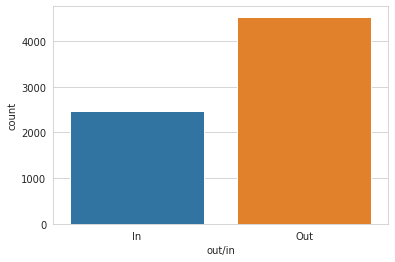

In [73]:
sns.countplot(df['out/in'])

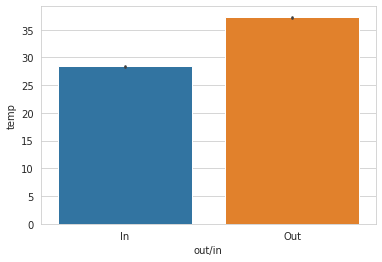

In [74]:
sns.barplot(df['out/in'],df['temp'])

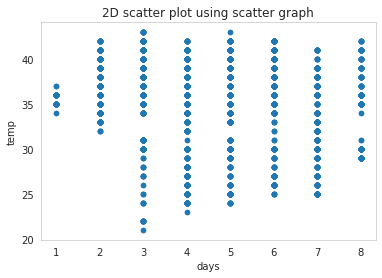

In [54]:
df.plot(kind = "scatter",x = "day",y = "temp")
plt.xlabel("days")
plt.ylabel("temp")
plt.title("2D scatter plot using scatter graph")
plt.grid()
plt.show()

**Observation: We use the scatter plot to plot the days on x-axis and temprature on y-axis. We use the matplotlib library which provides the function grid() and show(). Using those function,we plot the data into grid and also display it on console. Scatter plot shows the data as same color.We are unable to distinguish In and Out. So we use seaborn to visiualize the data in well form and make us to identify the data easily.**

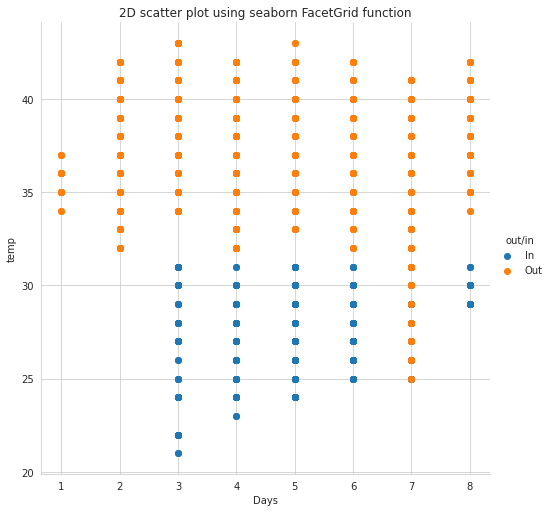

In [55]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="out/in",height=7)\
   .map(plt.scatter,"day","temp")\
   .add_legend()
plt.xlabel("Days")
plt.ylabel("temp")
plt.title("2D scatter plot using seaborn FacetGrid function")
plt.show()   

**Observation: We use seaborn library function FacetGrid(which plot multigrid object) show the difference between In and Out temprature. We can distingish the orange and blue color. Hence the blue color represents temprature by installed device inside room and orange color represents tempratrue by installed device outside room**

**Similarly, we visualize the temprature on behalf of month and year**

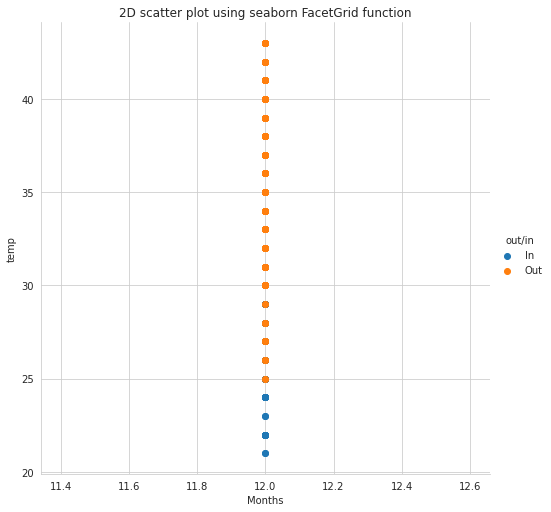

In [56]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="out/in",height=7)\
   .map(plt.scatter,"month","temp")\
   .add_legend()
plt.xlabel("Months")
plt.ylabel("temp")
plt.title("2D scatter plot using seaborn FacetGrid function")
plt.show()  

**Let's visualize the temprature on behalf on years**

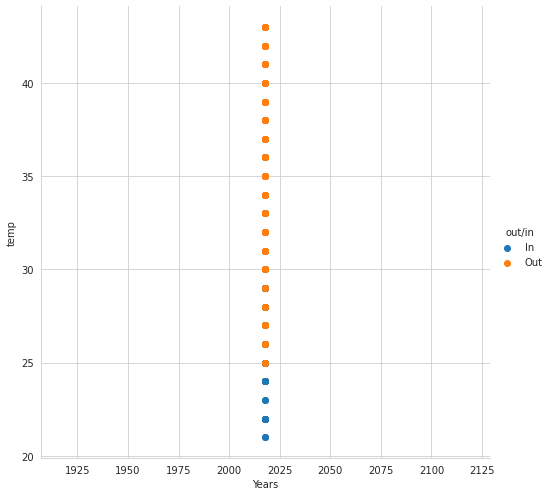

In [57]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="out/in",height=7)\
   .map(plt.scatter,"year","temp")\
   .add_legend()
plt.xlabel("Years")
plt.ylabel("temp")
plt.show()   

**Let's use pairplot**

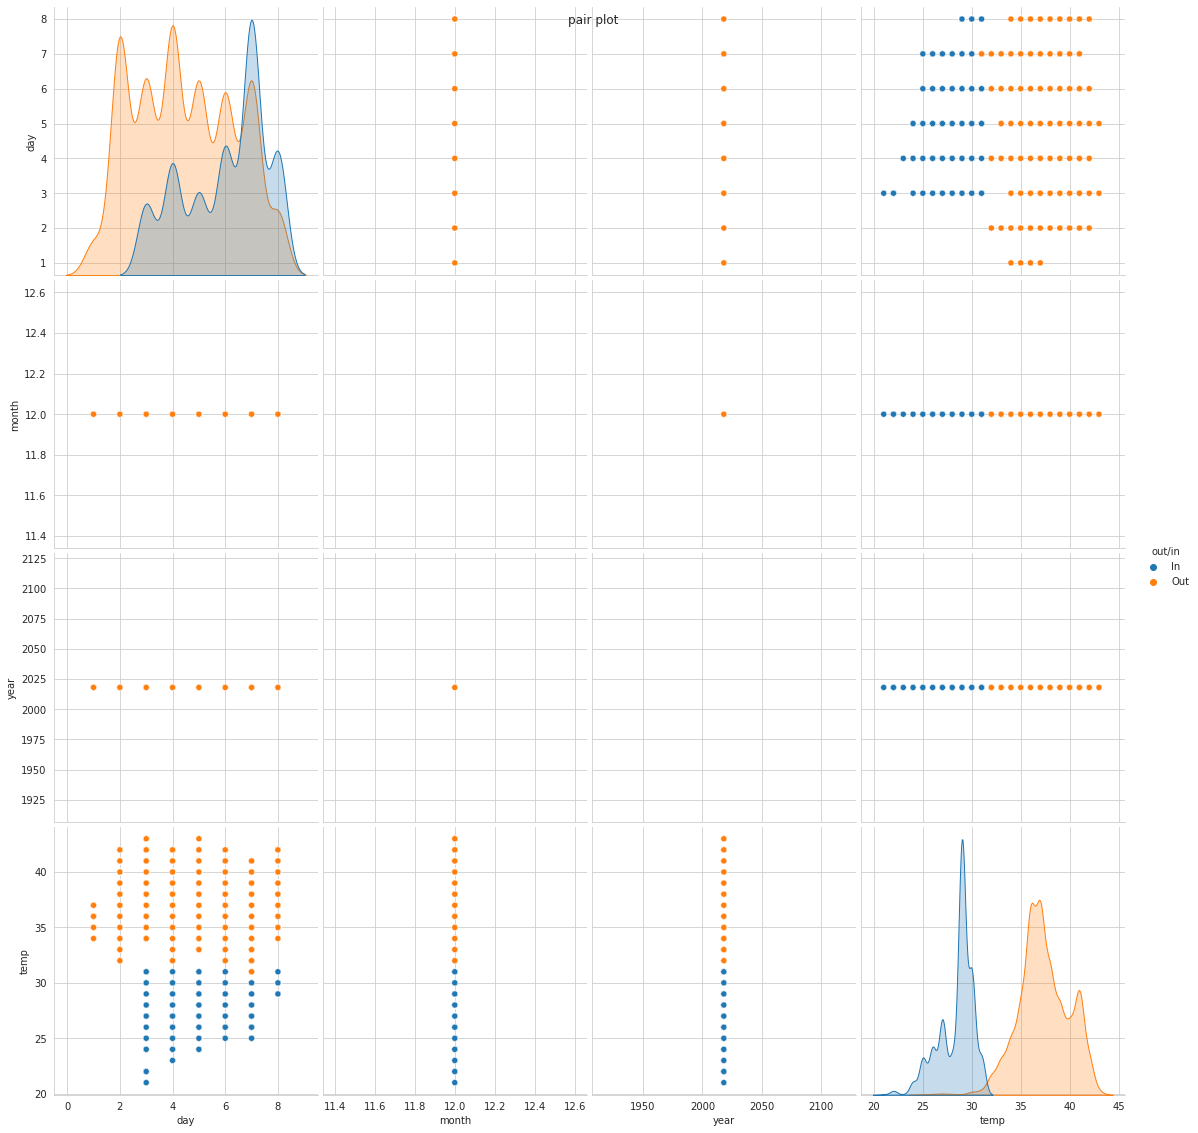

In [59]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
g = sns.pairplot(df,hue="out/in",height=4,vars=['day','month','year','temp'])
plt.suptitle("pair plot")
xlabel,ylabel = [],[]
for ax in g.axes[-1,:]:
  xlabels = ax.xaxis.get_label_text()
  xlabel.append(xlabels)
for ax in g.axes[:0]:
  ylabels = ax.yaxis.get_label_text()
  ylabel.append(ylabels)  

for i in range(len(xlabel)):
  for j in range(len(ylabel)):
    g.axes[j,i].xaxis.set_label_text(xlabel[i])
    g.axes[j,i].yaxis.set_label_text(ylabel[j])


plt.show()


When we seems that we can not plot 4D scatter so we used pairplot which visualize the data in 2D spaces

**Univariate Data Analysis**

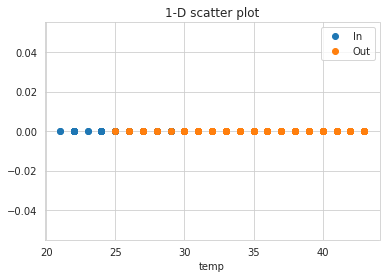

In [64]:
df_in = df.loc[df["out/in"]=='In']
df_out = df.loc[df["out/in"]=='Out']
plt.plot(df_in["temp"],np.zeros_like(df_in["temp"]),'o',label = "In")
plt.plot(df_out["temp"],np.zeros_like(df_out["temp"]),'o',label = 'Out')
plt.xlabel("temp")
plt.title("1-D scatter plot")
plt.legend()
plt.show()

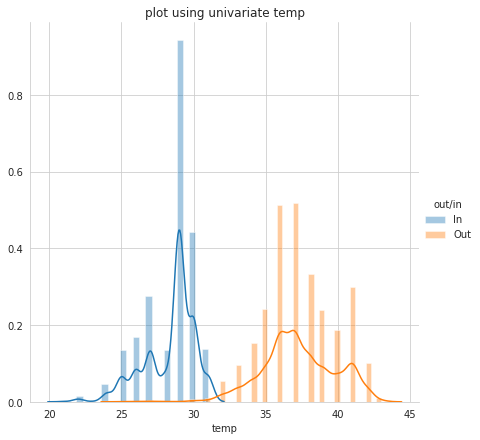

In [66]:
#PDF

import warnings
warnings.filterwarnings("ignore")

sns.FacetGrid(df,hue="out/in",height=6)\
   .map(sns.distplot,'temp')\
   .add_legend()
plt.title("plot using univariate temp")
plt.xlabel("temp")
plt.show()   

**Range of temprature inside room between 20 to 32 and outside room is 23 to 44**



In [77]:
import numpy as np
print("means and std-dev for df_in")
print(np.mean(df_in['temp']))
print(np.std(df_in['temp']))

print("mean and std-dev for df_out")
print(np.mean(df_out['temp']))


print(np.std(df_out['temp']))

means and std-dev for df_in
28.4015397082658
1.7639320565960288
mean and std-dev for df_out
37.28183623924079
2.550790406471302


**Observation: The value of mean and std-dev for outside room temprature comparatively high than inside room temprature**

**Let's boxplot and whiskers**

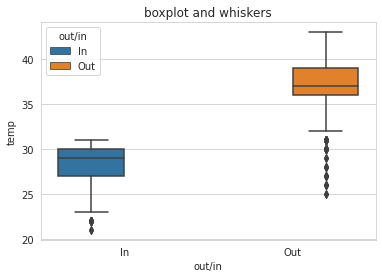

In [78]:
sns.boxplot(x = "out/in",y="temp",data = df,hue="out/in")
plt.title("boxplot and whiskers")
plt.xlabel("out/in")
plt.ylabel("temp")
plt.show()

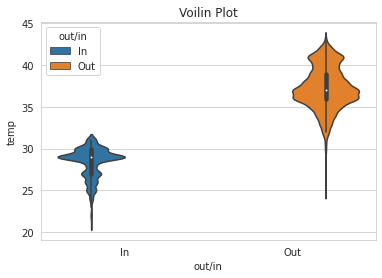

In [79]:
#Voilin plot

sns.violinplot(x="out/in",y="temp",data=df,size=8,hue="out/in")
plt.title("Voilin Plot")
plt.xlabel("out/in")
plt.ylabel("temp")
plt.show()